In [99]:
import nibabel as nib
import hcp_utils as hcp
import numpy as np
# Specify the path to the NIfTI file
nifti_path = '/Users/panlab/sub-MDMA001_ses-00_task-emotion_acq-mb_dir-pe0_run-0_space-MNI152NLin6Asym_res-2_desc-denoised_bold.nii.gz'
# Load the NIfTI file
nifti_image = nib.load(nifti_path)
nifti_data=nifti_image.get_fdata()

# Get the header from the NIfTI image
nifti_header = nifti_image.header

# Retrieve the resolution
resolution = nifti_header.get_zooms()

# Print the resolution
print("Resolution:", resolution)

Resolution: (2.0, 2.0, 2.0, 1.0)


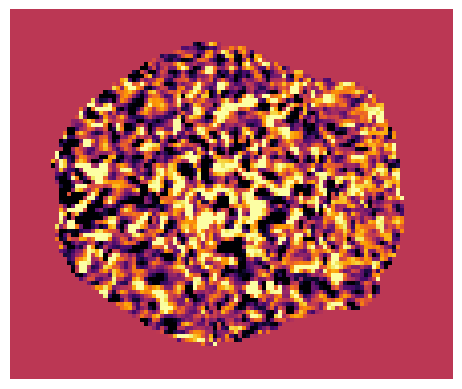

In [88]:
import matplotlib.pyplot as plt

Resolution: (2.0, 2.0, 2.0)


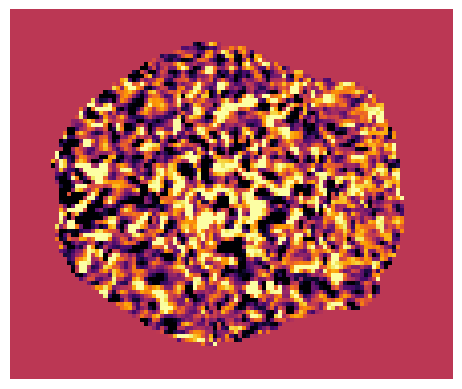

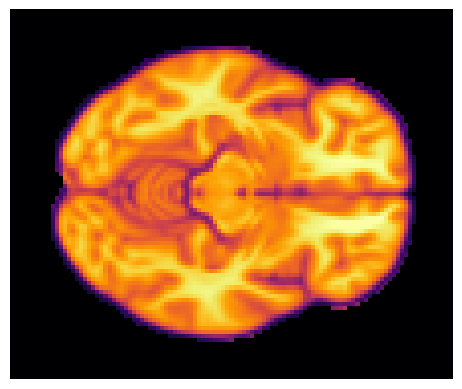

(22, 21, 13, 187)

In [144]:
# Define the bounding box coordinates
y_start, y_end = 45, 66
x_start, x_end = 33, 55
z_start, z_end = 33, 46

# Extract the spatial subset
subset = nifti_data[x_start:x_end, y_start:y_end, z_start:z_end,:]

# and plot slices on MNI to clarify exactly what space is being inquiried
mni_path = '/Users/panlab/Downloads/MNI152_T1_2mm_Brain.nii.gz'
# Load the NIfTI file
mni_image = nib.load(mni_path)
mni_data=mni_image.get_fdata()

# Extract the spatial subset
mnisubset = mni_data[x_start:x_end, y_start:y_end, z_start:z_end]
# Get the header from the NIfTI image
nifti_header = mni_image.header

# Retrieve the resolution
resolution = nifti_header.get_zooms()

# Print the resolution
print("Resolution:", resolution)

# Plot the central slice along the z-axis (assuming it's the axial plane)
z_slice = 30
plt.imshow(nifti_data[:, :, z_slice,0], cmap='inferno',vmin=-10, vmax=10)
plt.axis('off')
plt.show()

plt.imshow(mni_data[:, :, z_slice], cmap='inferno',vmin=0,vmax=8000)
plt.axis('off')
plt.show()

subset.shape

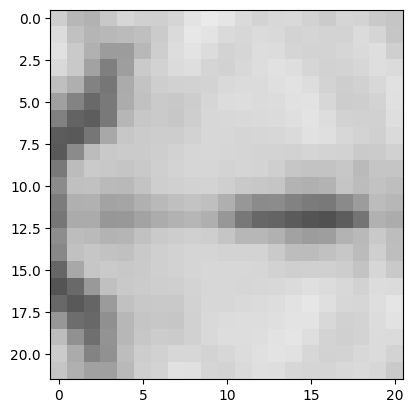

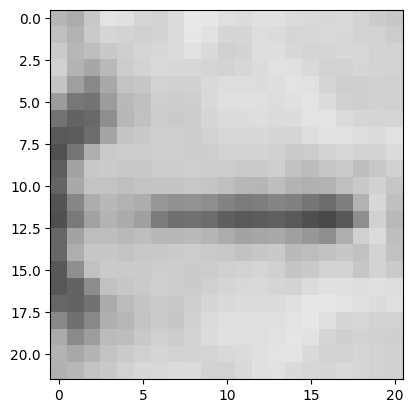

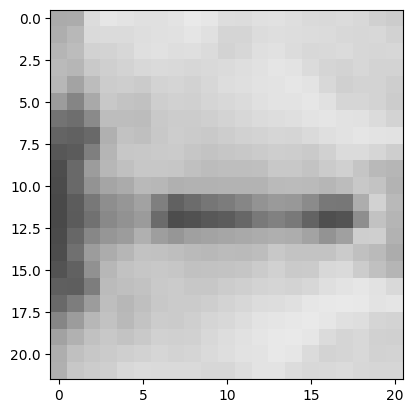

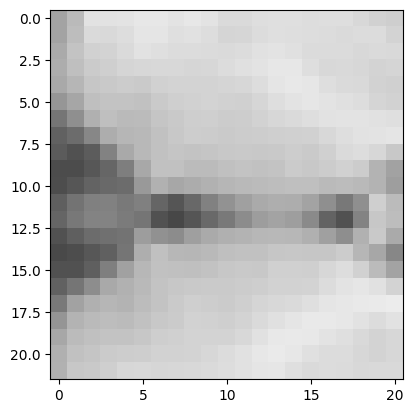

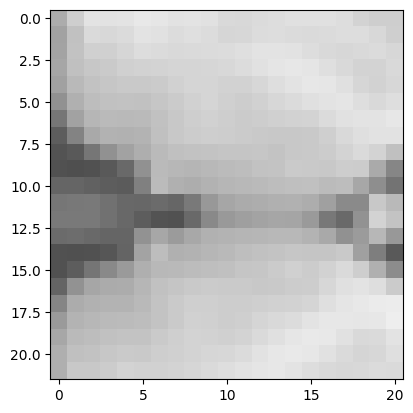

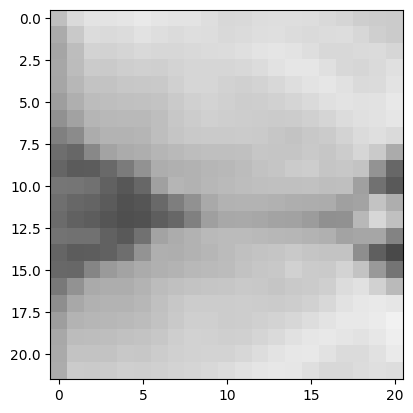

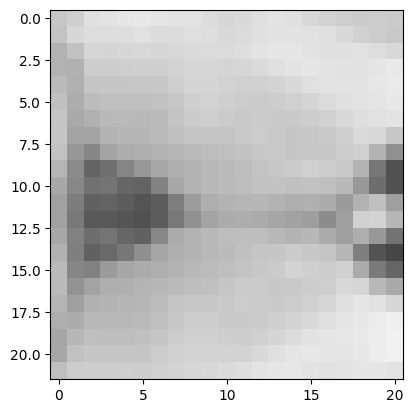

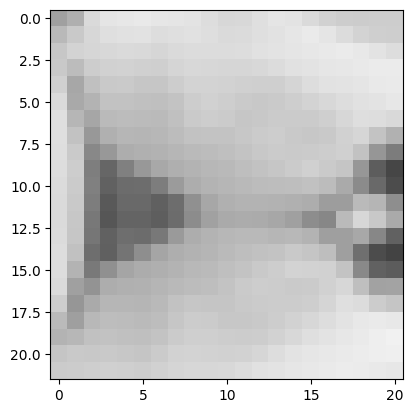

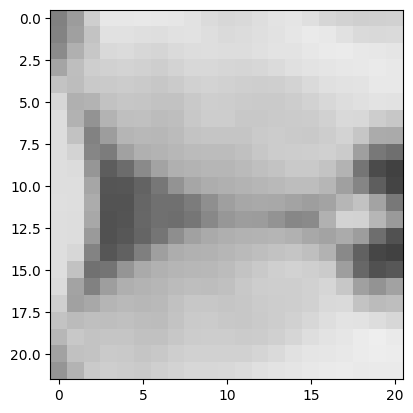

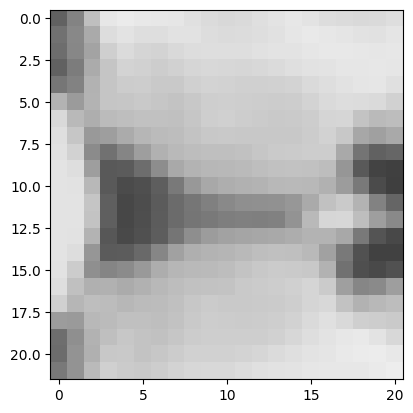

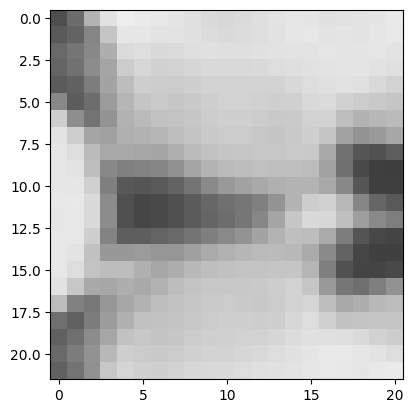

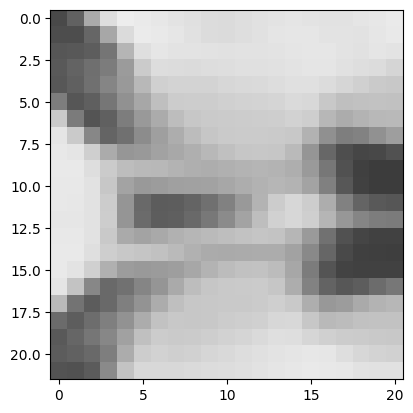

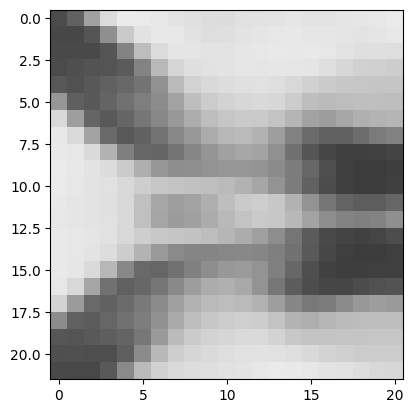

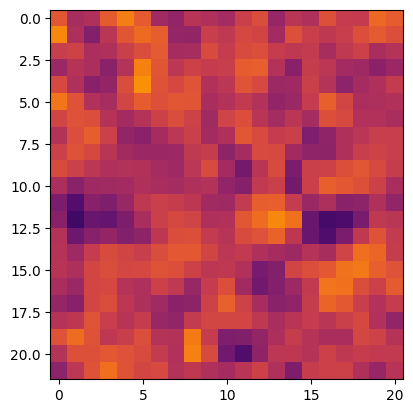

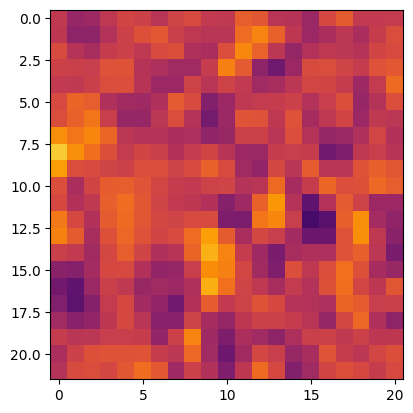

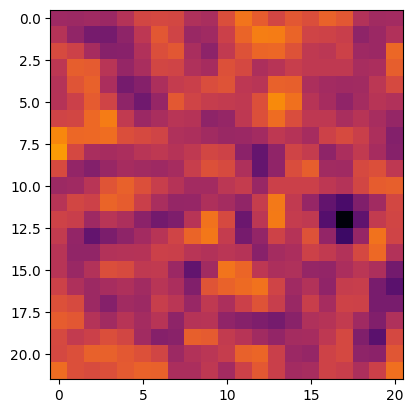

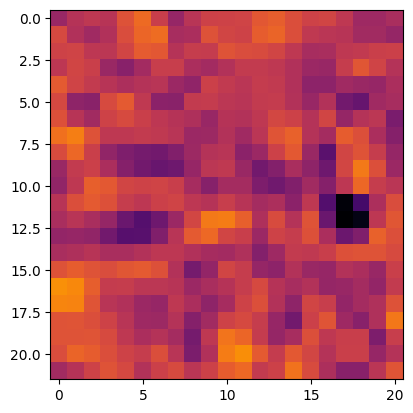

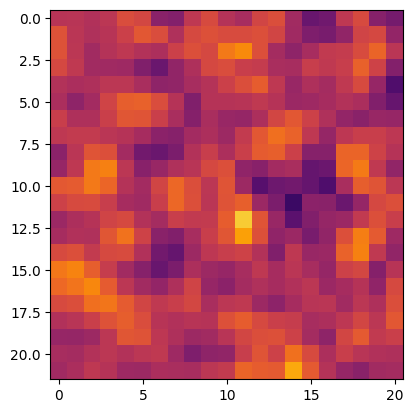

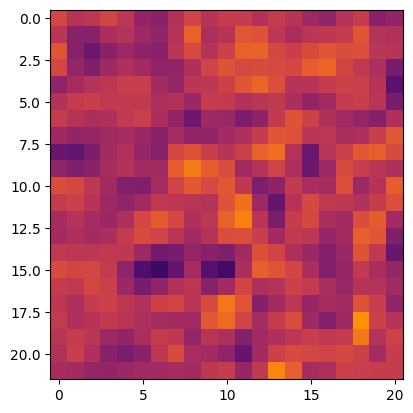

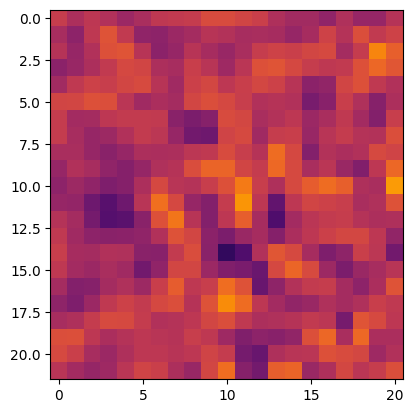

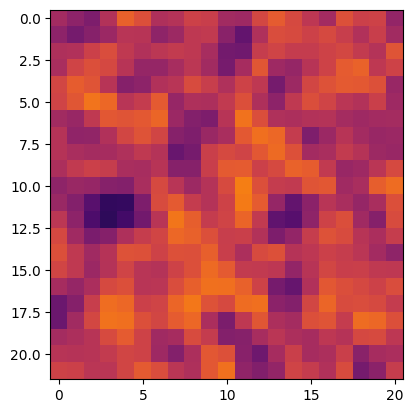

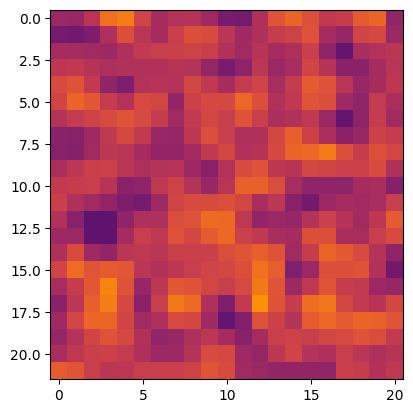

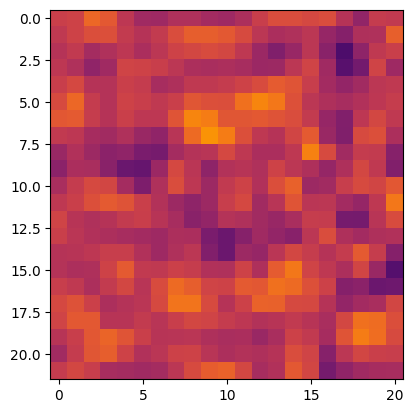

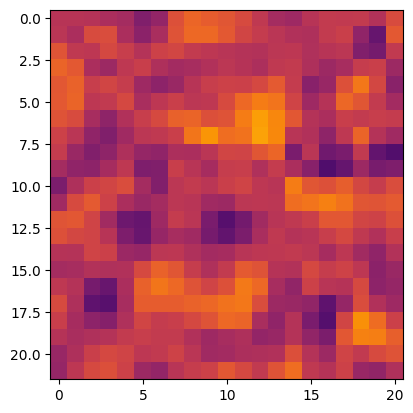

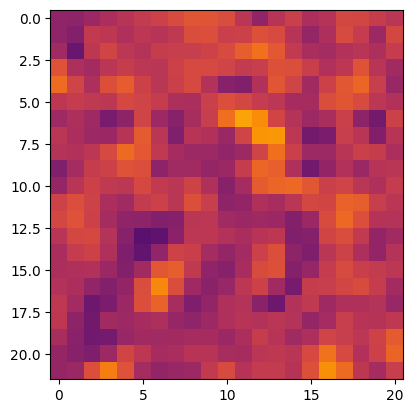

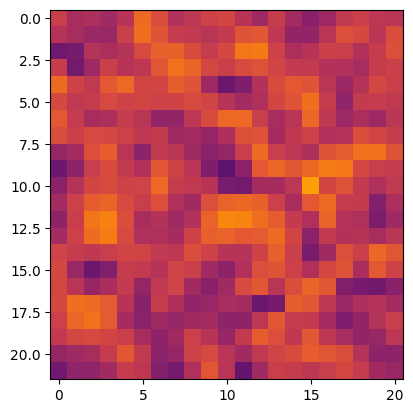

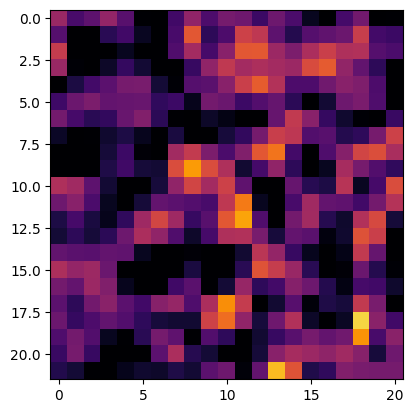

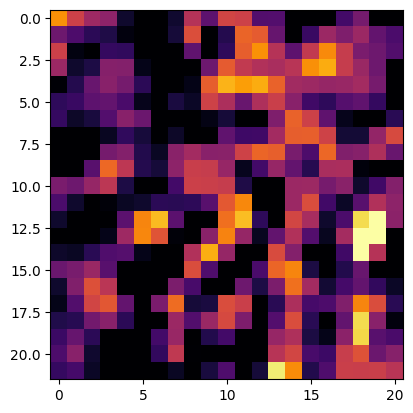

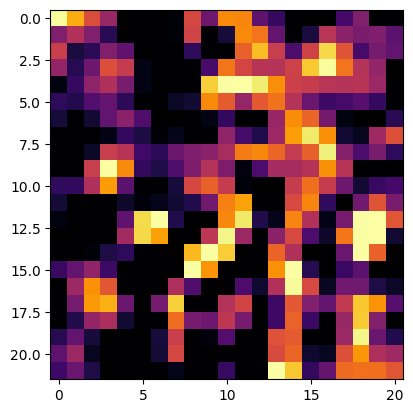

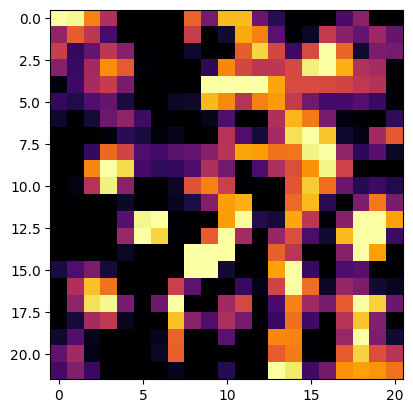

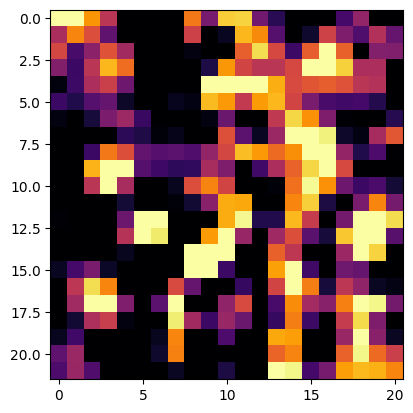

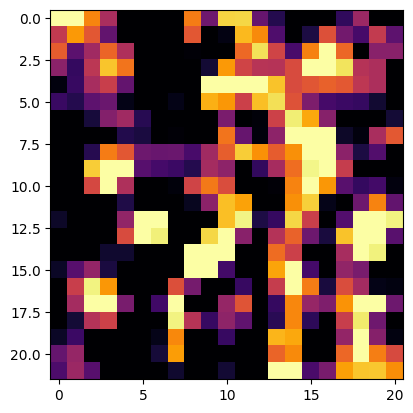

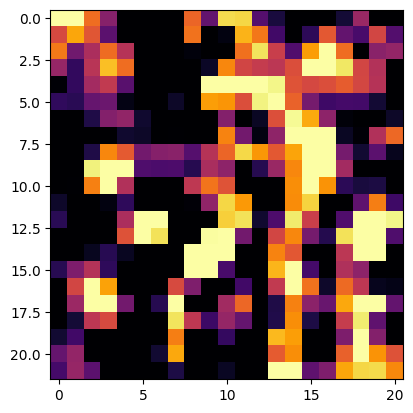

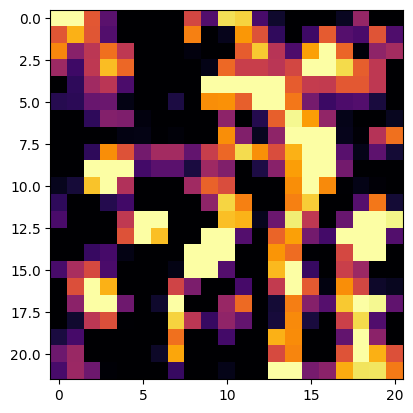

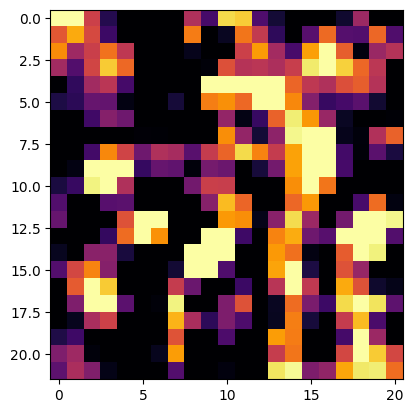

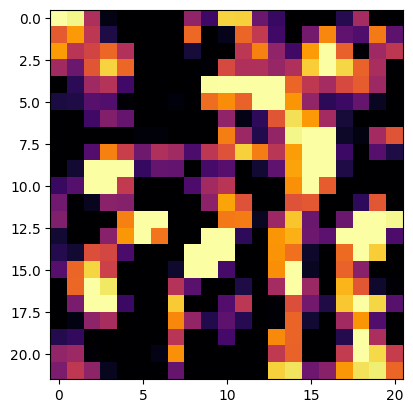

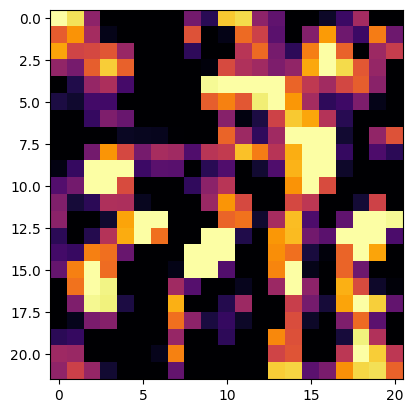

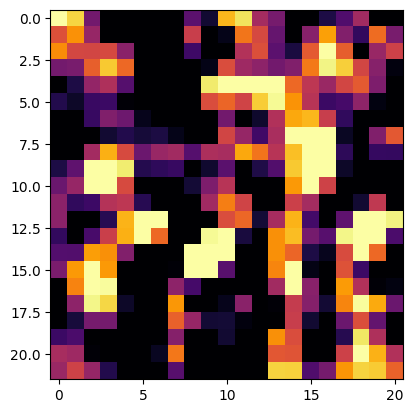

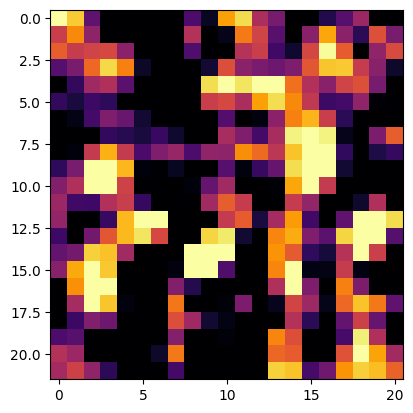

In [153]:
num_slices = z_end - z_start

for i, z_slice in enumerate(range(z_start, z_end)):
    plt.imshow(mnisubset[:, :, i], cmap='gray',vmin=0, vmax=8000)
    plt.show()
 
# same spatial dimensions for one functional image
for i, z_slice in enumerate(range(z_start, z_end)):
    plt.imshow(subset[:, :, i,0], cmap='inferno',vmin=-50, vmax=50)
    plt.show()
    
# one slice over time
for i, z_slice in enumerate(range(z_start, z_end)):
    plt.imshow(subset[:, :, 5,i], cmap='inferno',vmin=-10, vmax=30)
    plt.show() 

In [146]:
# now that the box is bounded, try fitting a few optical flow methods in first three frames

In [150]:
import cv2
# Optical flow using Method 1
flow1 = cv2.calcOpticalFlowFarneback(subset[:, :, 0, 0], subset[:, :, 0, 1], None, 0.5, 3, 15, 3, 5, 1.2, 0)

# Optical flow using Method 2
flow2 = cv2.optflow.calcOpticalFlowDenseRLOF(subset[:, :, 0, 0], subset[:, :, 0, 1], None)

# Optical flow using Method 3
flow3 = cv2.optflow.calcOpticalFlowSparseToDense(subset[:, :, 0, 0], subset[:, :, 0, 1], None)

# Display the shapes of the optical flow outputs
print("Method 1:", flow1.shape)
print("Method 2:", flow2.shape)
print("Method 3:", flow3.shape)

AttributeError: module 'cv2' has no attribute 'optflow'